In [ ]:
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
df = pd.read_csv("E:\Mahak Document\intern\World population by year.csv")

<>:4: SyntaxWarning: invalid escape sequence '\M'
<>:4: SyntaxWarning: invalid escape sequence '\M'
<ipython-input-4-781a0a3d26d8>:4: SyntaxWarning: invalid escape sequence '\M'
  df = pd.read_csv("E:\Mahak Document\intern\World population by year.csv")


In [ ]:
# displaying data
print(df)

    Year World Population Yearly Change   Net Change  Density
0   2023       8045311447         0.88%     70206291     54.0
1   2022   7,97,51,05,156         0.83%  6,58,10,005      NaN
2   2021   7,90,92,95,151         0.87%  6,83,42,271     53.0
3   2020   7,84,09,52,880         0.98%  7,60,01,848     53.0
4   2019   7,76,49,51,032         1.06%  8,11,61,204      NaN
5   2018   7,68,37,89,828         1.10%  8,39,67,424     52.0
6   2017   7,59,98,22,404         1.15%  8,63,48,166     51.0
7   2016   7,51,34,74,238         1.17%  8,68,76,701     50.0
8   2015   7,42,65,97,537         1.19%  8,75,84,118     50.0
9   2014   7,33,90,13,419         1.22%  8,84,20,049      NaN
10  2013   7,25,05,93,370         1.24%  8,88,95,449     49.0
11  2012   7,16,16,97,921         1.25%  8,85,72,496     48.0
12  2011   7,07,31,25,425         1.25%  8,75,22,320     47.0
13  2010   6,98,56,03,105         1.27%  8,72,97,197      NaN
14  2009   6,89,83,05,908         1.27%  8,67,08,636     46.0


In [ ]:
# data preparing and cleaning 
df.shape
df.info()
df.describe()
df.isnull(). sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              15 non-null     int64  
 1   World Population  15 non-null     object 
 2   Yearly Change     15 non-null     object 
 3   Net Change        15 non-null     object 
 4   Density           11 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 732.0+ bytes


Year                0
World Population    0
Yearly Change       0
Net Change          0
Density             4
dtype: int64

In [ ]:
# filling missing data  
data= df.loc[:, 'Density'].mean()
df.fillna({'Density':data}, inplace=True)
df.isnull(). sum()

Year                0
World Population    0
Yearly Change       0
Net Change          0
Density             0
dtype: int64

In [ ]:
# data Manupulation
# adding column of country share max population
country =['China','India','UK','France','China','Japan','Dubai','England','India','China','India','UK','France','China','Japan']
df.loc[:, "Country"] = country
print(df)

    Year World Population Yearly Change   Net Change    Density  Country
0   2023       8045311447         0.88%     70206291  54.000000    China
1   2022   7,97,51,05,156         0.83%  6,58,10,005  50.272727    India
2   2021   7,90,92,95,151         0.87%  6,83,42,271  53.000000       UK
3   2020   7,84,09,52,880         0.98%  7,60,01,848  53.000000   France
4   2019   7,76,49,51,032         1.06%  8,11,61,204  50.272727    China
5   2018   7,68,37,89,828         1.10%  8,39,67,424  52.000000    Japan
6   2017   7,59,98,22,404         1.15%  8,63,48,166  51.000000    Dubai
7   2016   7,51,34,74,238         1.17%  8,68,76,701  50.000000  England
8   2015   7,42,65,97,537         1.19%  8,75,84,118  50.000000    India
9   2014   7,33,90,13,419         1.22%  8,84,20,049  50.272727    China
10  2013   7,25,05,93,370         1.24%  8,88,95,449  49.000000    India
11  2012   7,16,16,97,921         1.25%  8,85,72,496  48.000000       UK
12  2011   7,07,31,25,425         1.25%  8,75,22,32

In [ ]:
# Exploratory analysis
# finding Maximum yearly change
max_yearchange = df.sort_values('Yearly Change', ascending=False).head(1)
print(max_yearchange)

    Year World Population Yearly Change   Net Change    Density Country
13  2010   6,98,56,03,105         1.27%  8,72,97,197  50.272727   China


In [ ]:
# finding 5 year with min net changes 
min_netchange = df.sort_values('Net Change').head(5)
print(min_netchange['Year'])

1    2022
2    2021
3    2020
0    2023
4    2019
Name: Year, dtype: int64


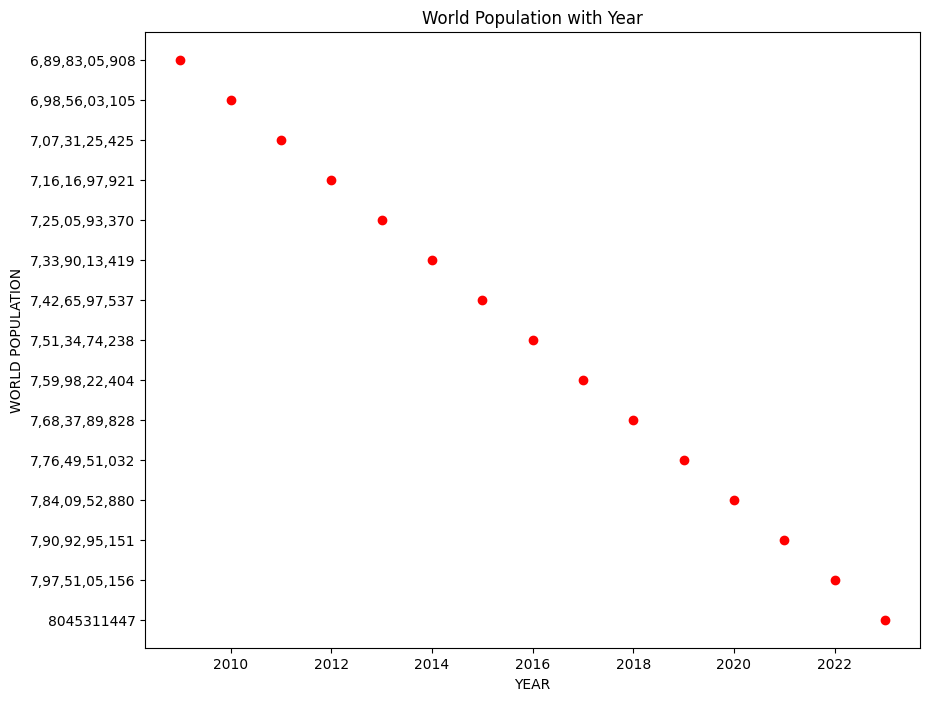

In [ ]:
# data visualisation
# world Population changes with year
plt.figure(figsize=(10,8))
plt.scatter(df['Year'],df['World Population'],color = 'red' )
plt.xlabel("YEAR")
plt.ylabel("WORLD POPULATION")
plt.title("World Population with Year")
plt.show()

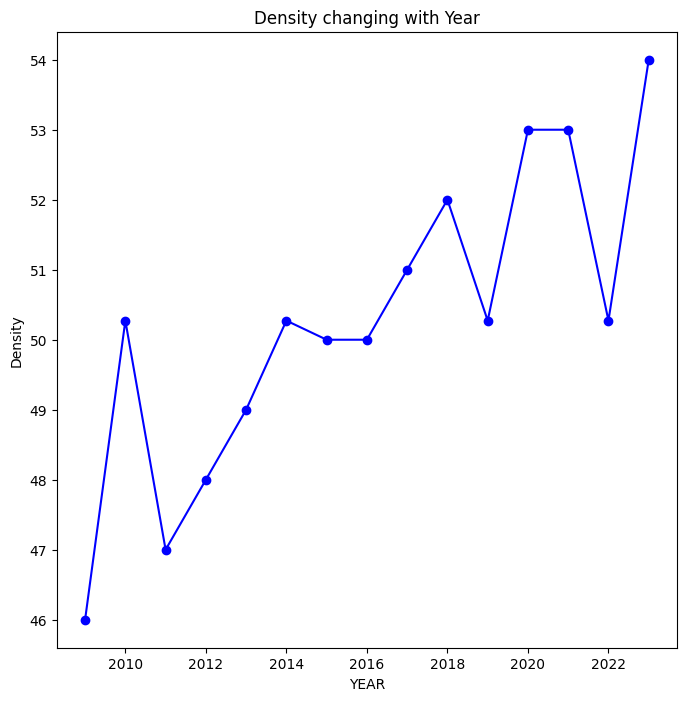

In [ ]:
# Density changes with year
plt.figure(figsize=(8,8))
plt.plot(df['Year'],df['Density'],color = 'blue',marker='o')
plt.xlabel("YEAR")
plt.ylabel("Density")
plt.title("Density changing with Year")
plt.show()

In [ ]:
# predicting Population
df['World Population'] = df['World Population'].str.replace(',', '').astype(int)
print(df.dtypes)
x=df[['Year']].values
y=df["World Population"].values
reg=linear_model.LinearRegression()
reg.fit(x,y)
print("Expected Population in 2025 is ",reg.predict([[2025]]))
print("Expected Population in 1995 was ",reg.predict([[1995]]))

Year                  int64
World Population      int64
Yearly Change        object
Net Change           object
Density             float64
Country              object
dtype: object
Expected Population in 2025 is  [8.24579949e+09]
Expected Population in 1995 was  [5.75260982e+09]


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


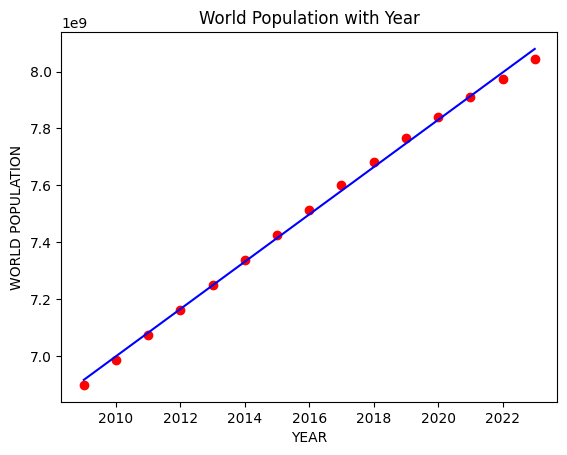

In [ ]:
# By Graph analysing accuracy of Prediction 
pre = reg.predict(df[["Year"]])
df["Prediction"]=pre
plt.scatter(df['Year'],df['World Population'],color = 'red' )
plt.plot(df['Year'],df["Prediction"],color="blue")
plt.xlabel("YEAR")
plt.ylabel("WORLD POPULATION")
plt.title("World Population with Year")
plt.show()